# Part 1
## GOAL 
- find objects in an image using Template Matching

We need a template image. For a test, I take a capture of the fish as a template. 

For my code, I use this http://docs.opencv.org/3.1.0/d4/dc6/tutorial_py_template_matching.html

In [129]:
import imread
import os 
from scipy import ndimage
from subprocess import check_output

import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

#### Use the technique Template Matching with 6 methods, and compare each other 

The template for LAG fish that I use :  

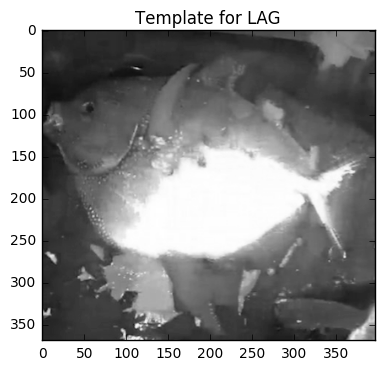

In [125]:
template = cv2.imread('/Users/HUGO/Desktop/template2.jpg',0)
plt.imshow(template, cmap='gray')
plt.title('Template for LAG')

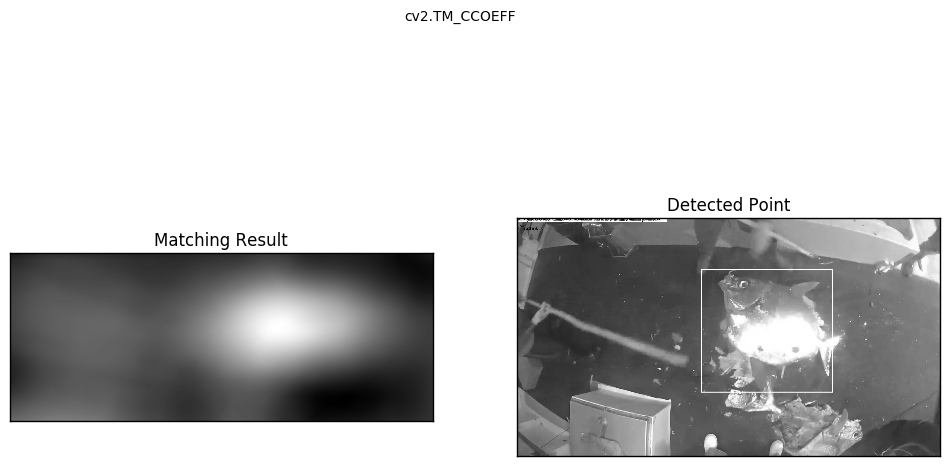

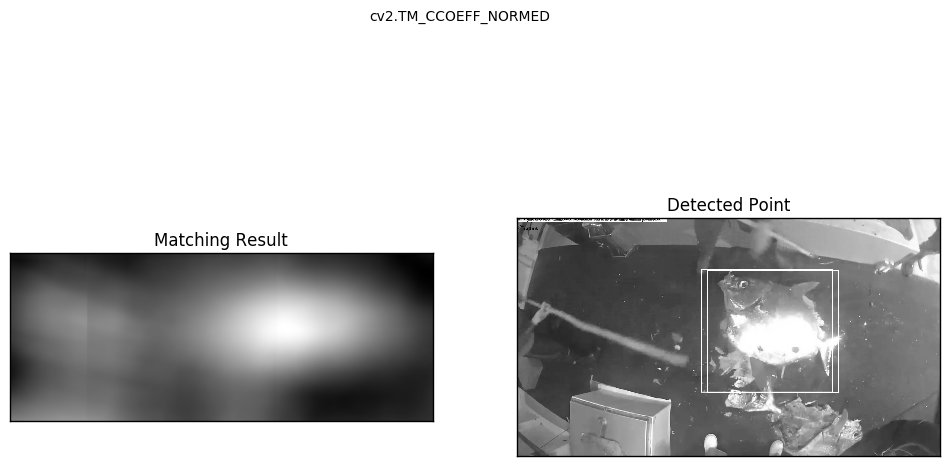

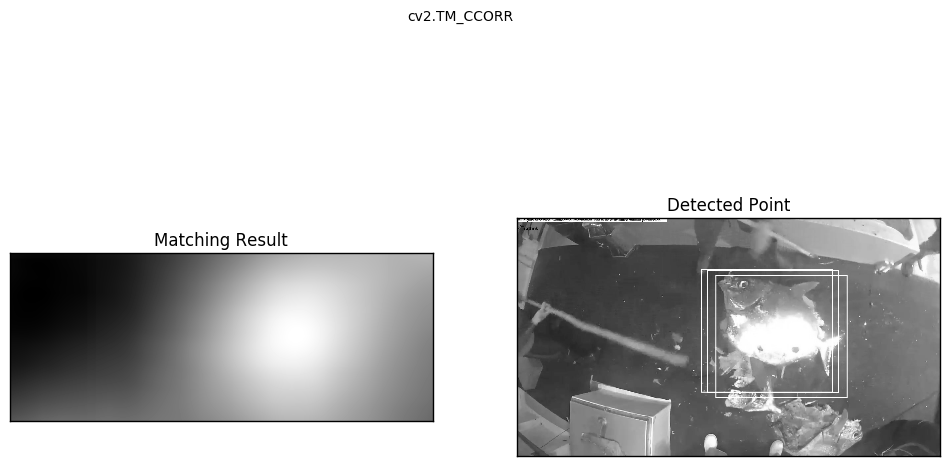

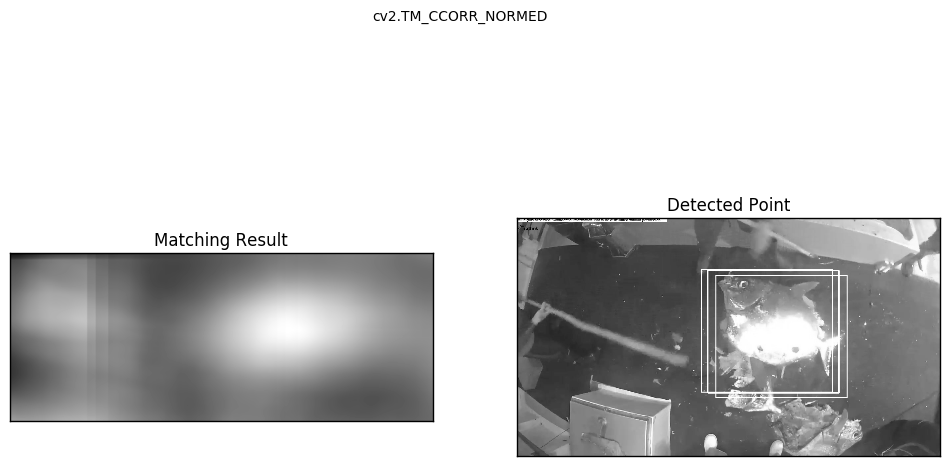

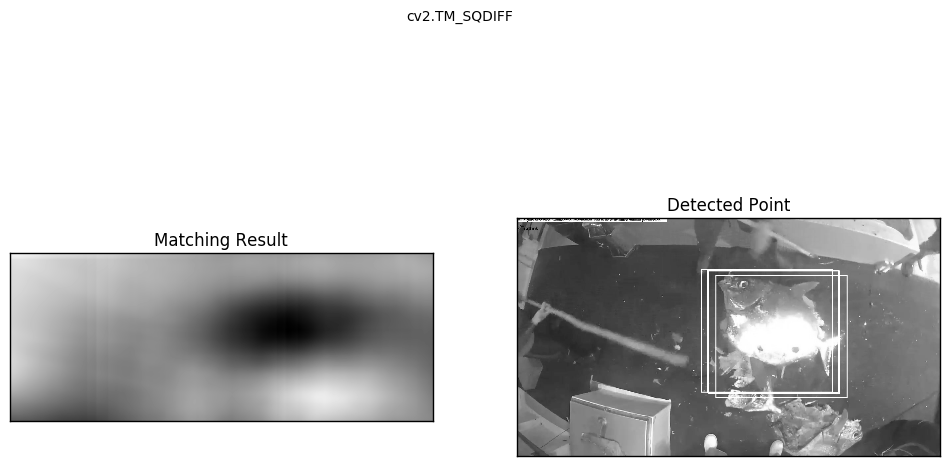

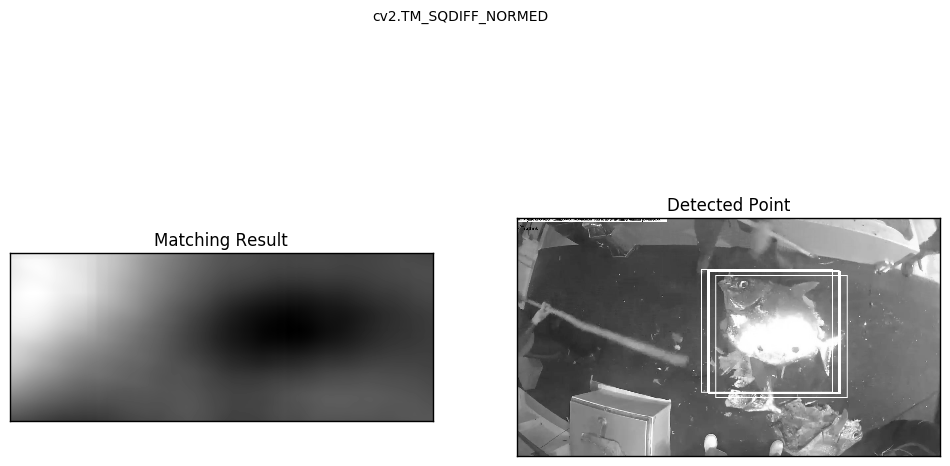

In [126]:
os.chdir('/Users/HUGO/Documents/Kaggle/FISH/train/LAG')
file_name = 'img_01512.jpg' # img_00176,img_02758, img_01512
img = cv2.imread(file_name,0) 
img2 = img
template = cv2.imread('/Users/HUGO/Desktop/template2.jpg',0)
w, h = template.shape[::-1]

# All the 6 methods for comparison in a list
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR',
            'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

for meth in methods:
     img = img2
     method = eval(meth)
 
     # Apply template Matching
     res = cv2.matchTemplate(img,template,method)
     min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
 
     # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
     if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
         top_left = min_loc
     else:
         top_left = max_loc
     bottom_right = (top_left[0] + w, top_left[1] + h)
 
     cv2.rectangle(img,top_left, bottom_right, 255, 2)
     fig, ax = plt.subplots(figsize=(12, 7))
     plt.subplot(121),plt.imshow(res,cmap = 'gray')
     plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
     plt.subplot(122),plt.imshow(img,cmap = 'gray') #,aspect='auto'
     plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
     plt.suptitle(meth)
 
     plt.show()

## Remark : 

All of them (methods) detect the template in the image. Sometime, we can detect some other part in the image. 

I choose the cv2.TM_CCOEFF method. 
Let's try with mutliple image. 

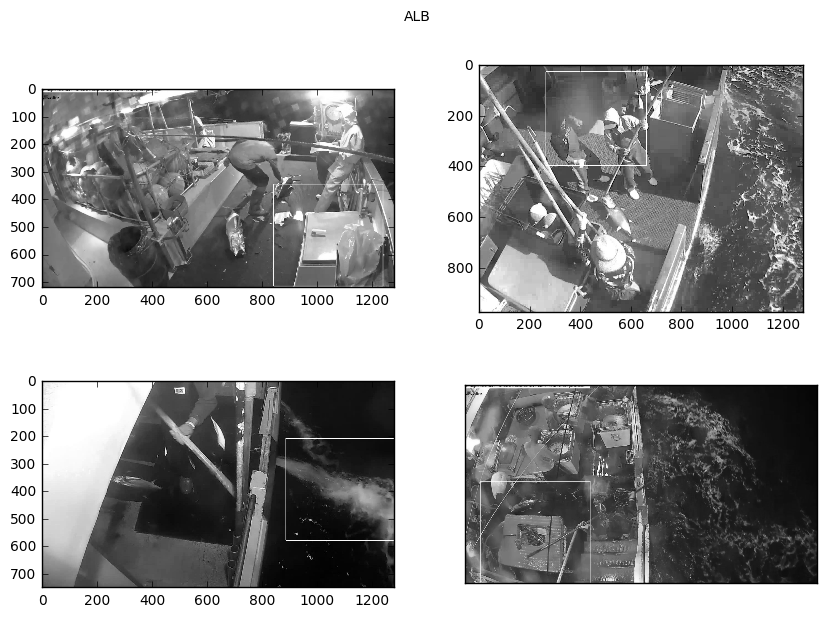

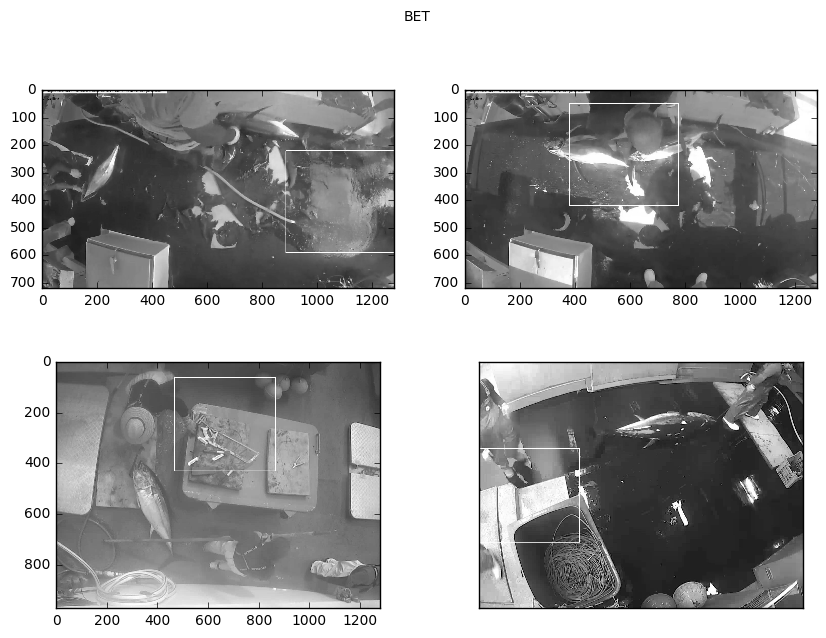

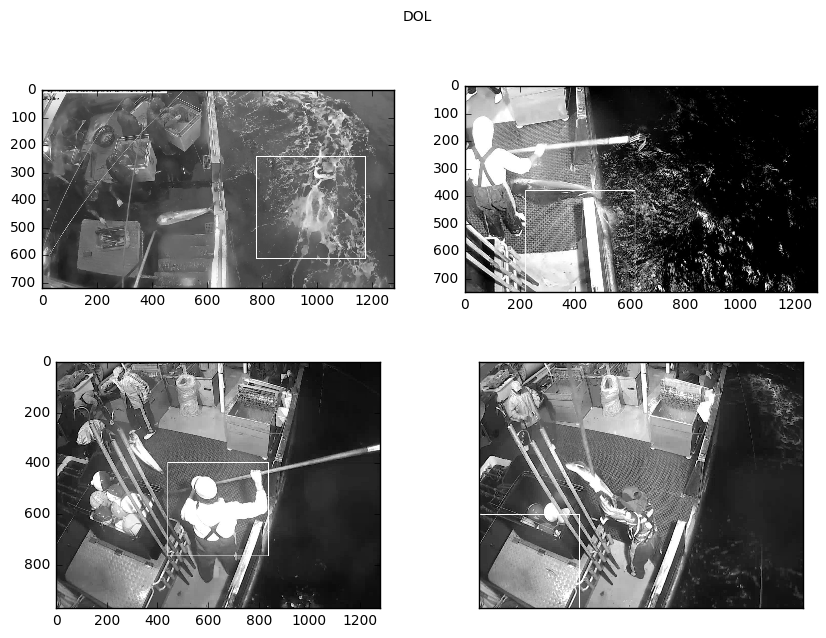

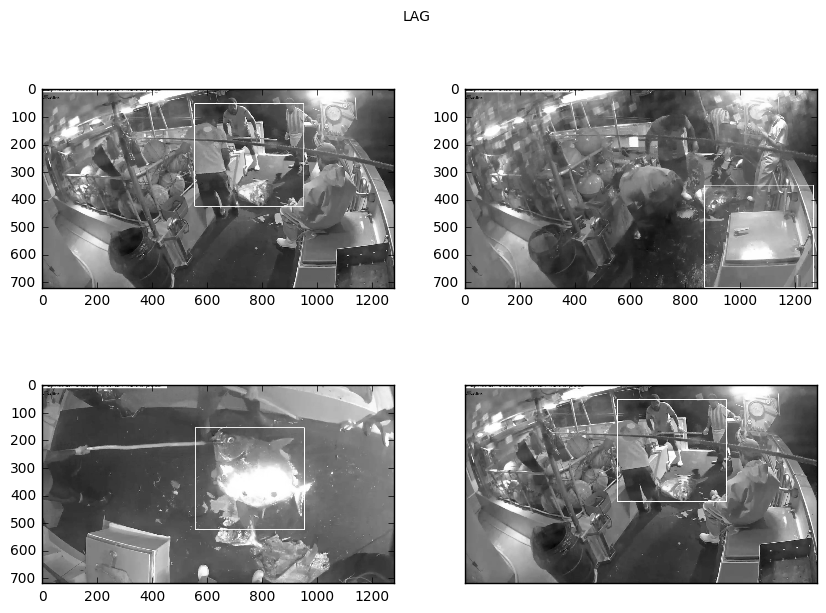

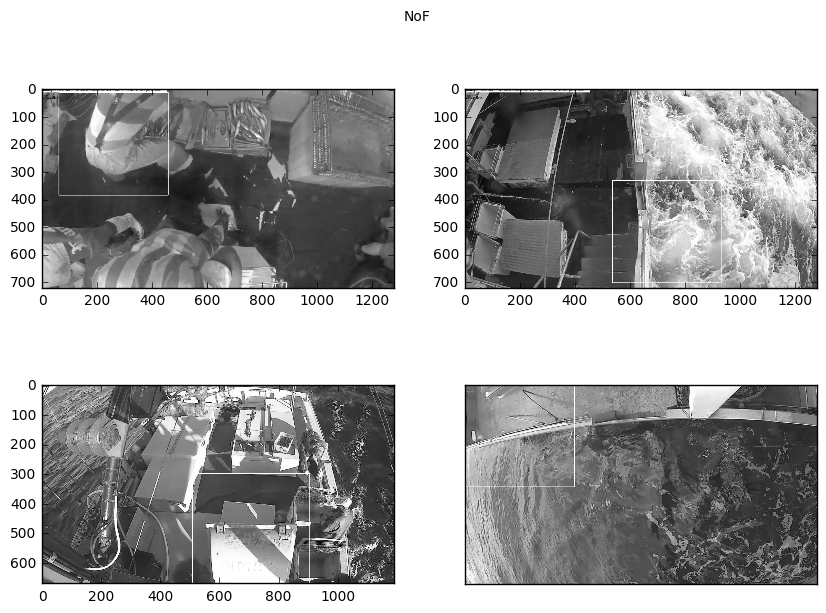

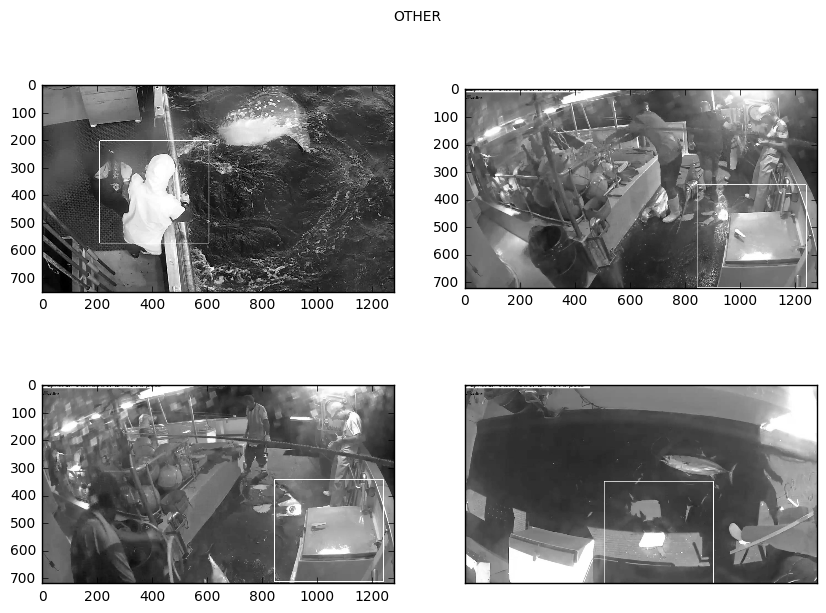

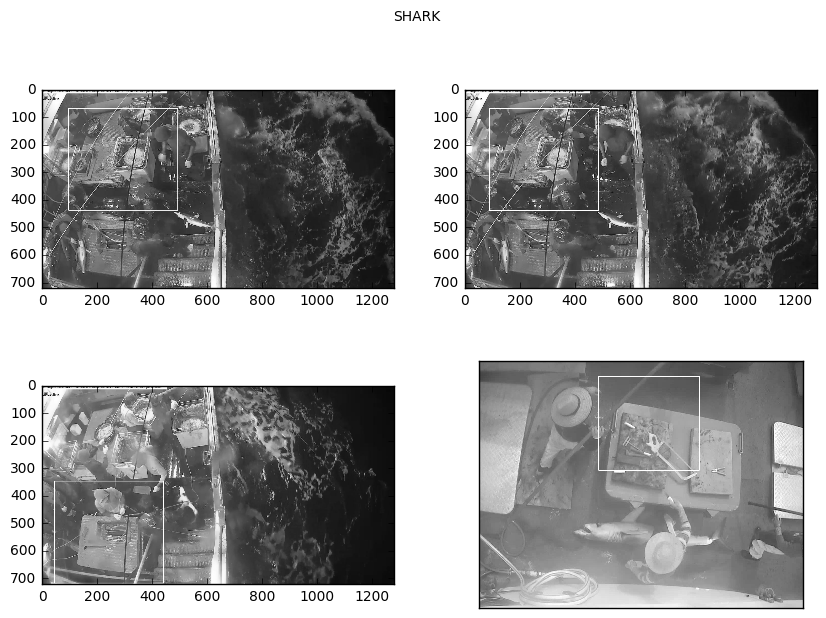

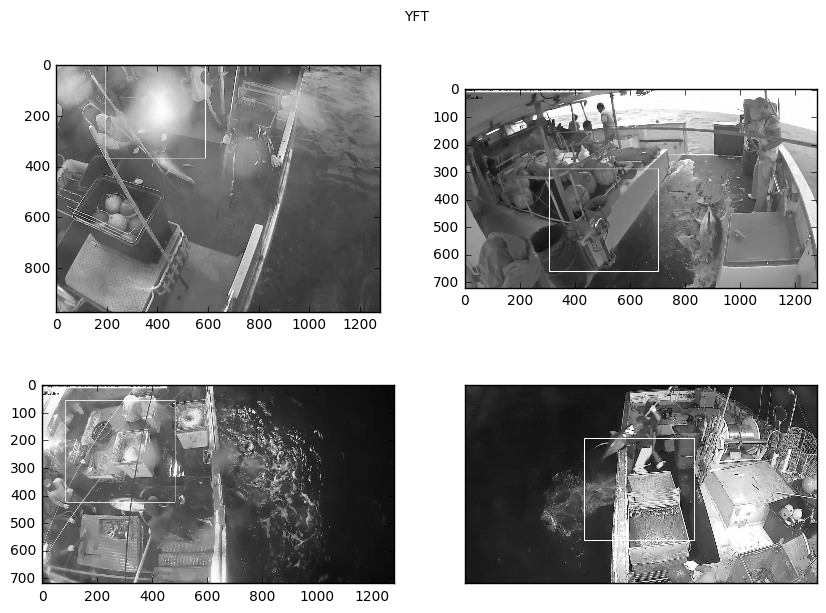

In [236]:
os.chdir('/Users/HUGO/Documents/Kaggle/FISH/train/')
method = eval('cv2.TM_CCOEFF')
template = cv2.imread('/Users/HUGO/Desktop/template2.jpg',0)

train_path = "../train/"
sub_folders = check_output(["ls", train_path]).decode("utf8").strip().split('\n')
for sub_folder in sub_folders:
    file_names = check_output(["ls", train_path+sub_folder]).decode("utf8").strip().split('\n')
    k=0
    _, ax = plt.subplots(2,2,figsize=(10, 7))
    for file_name in file_names[1:5]:
        img = cv2.imread(train_path+sub_folder+"/"+file_name,0)
        img2 = img
        w, h = template.shape[::-1]
        # Apply template Matching
        res = cv2.matchTemplate(img,template,method)
        min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
        top_left = max_loc
        bottom_right = (top_left[0] + w, top_left[1] + h)
 
        cv2.rectangle(img,top_left, bottom_right, 255, 2)
        if k==0 : 
            ax[0,0].imshow(img,cmap = 'gray')
            plt.xticks([]), plt.yticks([])
        if k==1 : 
            ax[0,1].imshow(img,cmap = 'gray')
            plt.xticks([]), plt.yticks([])
        if k==2 : 
            ax[1,0].imshow(img,cmap = 'gray')
            plt.xticks([]), plt.yticks([])
        if k==3 : 
            ax[1,1].imshow(img,cmap = 'gray')
            plt.xticks([]), plt.yticks([])
        k=k+1
    plt.suptitle(sub_folder)
    plt.show()


### Remark :
we can see that with a LAG template, we find the fish LAG and not the other.

So we can create different template for each fish. 

# Part 2

Pick up the top left on an image. For exemple a square of 500 $\times$ 500 $\times$ 3

In [244]:
img_rows, img_cols, img_rgb = 500, 500, 3
im_array = cv2.imread('/Users/HUGO/Documents/Kaggle/FISH/train/LAG/img_01527.jpg')
X = np.zeros([ img_rows, img_cols, img_rgb])
X[:, :, :] = im_array[:500,:500,:].astype('float32')
X /= 255.


(<matplotlib.axes._subplots.AxesSubplot at 0x111616f90>,
 <matplotlib.image.AxesImage at 0x10b089690>)

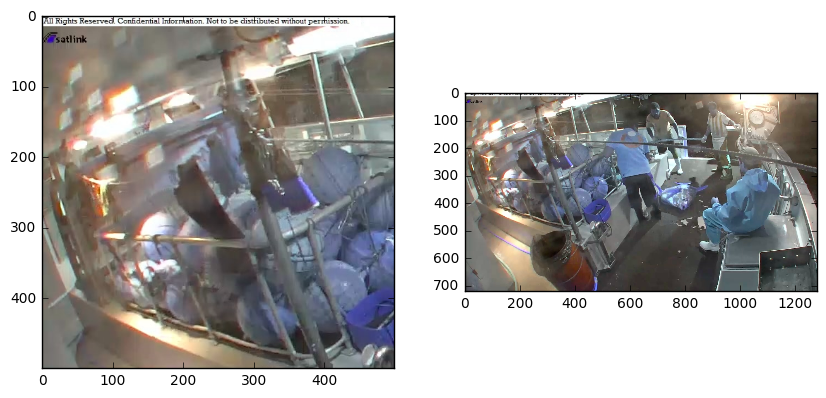

In [247]:
plt.subplots(figsize=(10, 7))
plt.subplot(121),plt.imshow(X,cmap = 'gray') 
plt.subplot(122), plt.imshow(im_array)

(<matplotlib.axes._subplots.AxesSubplot at 0x11563d690>,
 <matplotlib.image.AxesImage at 0x11bdc7e90>)

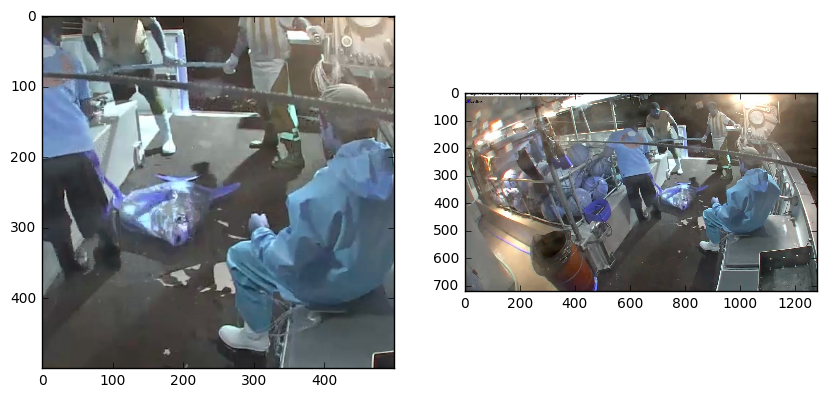

In [252]:
img_rows, img_cols, img_rgb = 500, 500, 3
im_array = cv2.imread('/Users/HUGO/Documents/Kaggle/FISH/train/LAG/img_01527.jpg')
X = np.zeros([ img_rows, img_cols, img_rgb])
X[:, :, :] = im_array[100:600,600:1100,:].astype('float32')
X /= 255.
plt.subplots(figsize=(10, 7))
plt.subplot(121),plt.imshow(X,cmap = 'gray') 
plt.subplot(122), plt.imshow(im_array)

# Part 3

 Inspired by this website : http://www.pyimagesearch.com/2014/10/20/finding-shapes-images-using-python-opencv/
 

In [254]:
# import the necessary packages
import numpy as np
import argparse
import cv2

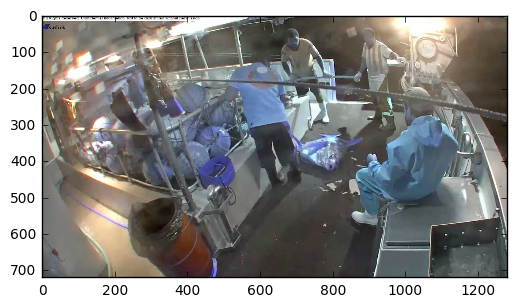

In [284]:
# construct the argument parse and parse the arguments
ap = argparse.ArgumentParser()
#ap.add_argument("-i", "--image", help = "/Users/HUGO/Documents/Kaggle/FISH/train/LAG/img_01527.jpg")
#args = vars(ap.parse_args())

# load the image
image = cv2.imread('/Users/HUGO/Documents/Kaggle/FISH/train/LAG/img_01527.jpg')
plt.imshow(image)

In [287]:
# find all the 'black' shapes in the image
lower = np.array([0, 0, 0]) # ([17, 15, 100], [50, 56, 200]) blue
upper = np.array([40,50,200]) # [0,140,255], [0,165,255] orange
shapeMask = cv2.inRange(image, lower, upper)

In [ ]:
# define the list of boundaries
boundaries = [
	([17, 15, 100], [50, 56, 200]),
	([86, 31, 4], [220, 88, 50]),
	([25, 146, 190], [62, 174, 250]),
	([103, 86, 65], [145, 133, 128])
]

# loop over the boundaries
for (lower, upper) in boundaries:
	# create NumPy arrays from the boundaries
	lower = np.array(lower, dtype = "uint8")
	upper = np.array(upper, dtype = "uint8")
 
	# find the colors within the specified boundaries and apply
	# the mask
	mask = cv2.inRange(image, lower, upper)
	output = cv2.bitwise_and(image, image, mask = mask)
 
	# show the images
	cv2.imshow("images", np.hstack([image, output]))
	cv2.waitKey(0)

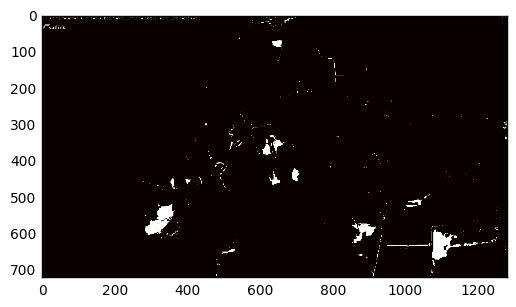

In [288]:
plt.imshow(shapeMask,cmap='hot')

In [280]:
sum(sum(shapeMask==0))

921600

In [277]:
720*1280

921600